<a href="https://colab.research.google.com/github/Huda-AlGhussein/MNIST-classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Importing the MNIST dataset**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


There are 60000 images that are 28x28. Each image has a label.

In [6]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


10000 images for testing

**Visualizing the data:**

The label:  5


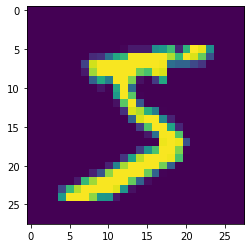

In [10]:
plt.imshow(x_train[0][:,:])
print("The label: ", y_train[0])

**Preparing the Data**


The Conv2D expect an input of 4D. The number of data, height, width, and depth of image. 

In [14]:
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train= x_train / 255.0 #normalization
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [15]:
x_train.shape

(60000, 28, 28, 1)

**Modeling:**

In [17]:
no_classes= 10

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(12, (7,7), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(8, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(no_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 4)         104       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 12)        2364      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 12)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 8)           872       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 8)         

In [20]:
model.fit(x_train, y_train, batch_size= 100, epochs= 4, validation_data= (x_test, y_test))

Epoch 1/4
600/600 [==============================] - 62s 100ms/step - loss: 1.2579 - acc: 0.5689 - val_loss: 0.5323 - val_acc: 0.8332
Epoch 2/4
600/600 [==============================] - 59s 99ms/step - loss: 0.4234 - acc: 0.8686 - val_loss: 0.3316 - val_acc: 0.8990
Epoch 3/4
600/600 [==============================] - 74s 123ms/step - loss: 0.3087 - acc: 0.9024 - val_loss: 0.2697 - val_acc: 0.9207
Epoch 4/4
600/600 [==============================] - 61s 101ms/step - loss: 0.2511 - acc: 0.9218 - val_loss: 0.2149 - val_acc: 0.9363


**Visulaize the prediction:**

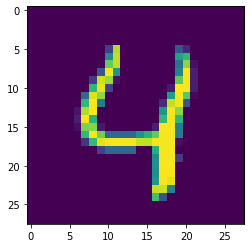

In [24]:
plt.imshow(x_test[4][:,:,0])

Model return a probability array. Each probability of the input image represent the likelihood for the image in each possible class. 

Argmax will show the result with the highest probability

In [26]:
np.argmax(model.predict(np.expand_dims(x_test[4],0)))

1/1 [==============================] - 0s 25ms/step


4